In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("/Users/premswaroop/Desktop/jupyter1/Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
#changing characters to integers
df["Gender"]=df["Gender"].map({'Male':1,'Female':2})
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


In [27]:
#we earlier removed userID
inputs=df.drop("Purchased",axis='columns')
target=df['Purchased']

In [28]:
inputs.head(5)

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,2,26,43000
3,2,27,57000
4,1,19,76000


In [29]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.33)

In [60]:
len(X_train)

268

In [61]:
len(X_test)

132

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
#using feature transformation
#applying standard scaler seperately for both train and test data
#in order to avoid overfitting we do it seperately
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [64]:
X_train_scaled

array([[ 0.98518437,  1.51749287, -1.32785165],
       [-1.01503844, -0.27991902, -0.34323523],
       [ 0.98518437, -0.27991902,  0.04464396],
       [-1.01503844,  1.70669413,  1.86469249],
       [ 0.98518437,  1.80129475, -1.32785165],
       [ 0.98518437, -1.50972715, -0.46258268],
       [ 0.98518437,  1.6120935 ,  1.6259976 ],
       [-1.01503844, -1.13132465,  0.46236002],
       [ 0.98518437,  1.42289225,  0.34301257],
       [-1.01503844, -1.22592527,  0.49219688],
       [ 0.98518437,  0.66608724,  1.80501877],
       [ 0.98518437, -1.6989284 , -1.02948304],
       [-1.01503844, -1.3205259 , -0.3730721 ],
       [-1.01503844,  0.94988912,  0.10431768],
       [ 0.98518437,  0.85528849, -0.58193012],
       [ 0.98518437, -0.09071776, -1.11899362],
       [-1.01503844, -0.18531839, -0.55209326],
       [ 0.98518437, -1.3205259 , -1.14883049],
       [-1.01503844,  0.19308411,  1.0889341 ],
       [ 0.98518437, -1.3205259 , -0.46258268],
       [-1.01503844,  1.51749287, -0.015

In [65]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[ 0.98518437, -0.56372089,  1.92436621],
       [-1.01503844, -1.13132465, -1.14883049],
       [-1.01503844, -0.27991902,  1.11877096],
       [-1.01503844,  2.08509663,  0.37284943],
       [-1.01503844,  1.6120935 , -0.93997246],
       [-1.01503844, -0.84752277, -0.82062501],
       [-1.01503844, -1.13132465,  0.31317571],
       [ 0.98518437, -1.41512653,  0.34301257],
       [-1.01503844,  0.76068787, -1.41736224],
       [ 0.98518437,  0.38228536,  0.58170746],
       [ 0.98518437, -0.37451964, -0.82062501],
       [ 0.98518437,  0.38228536, -0.5222564 ],
       [-1.01503844,  1.70669413, -0.31339837],
       [-1.01503844,  0.09848349, -0.85046187],
       [ 0.98518437, -1.50972715, -0.22388779],
       [-1.01503844, -1.13132465, -1.65605712],
       [ 0.98518437, -0.09071776,  2.25257168],
       [ 0.98518437, -0.27991902, -0.61176698],
       [ 0.98518437, -0.27991902, -1.35768851],
       [-1.01503844,  0.76068787, -0.34323523],
       [-1.01503844,  0.28768474,  0.492

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

In [41]:
#model.score(X_test,y_test)#0.8625 
# for n_estimators=50
#this is the accuracy we got before applying standardscaler

0.8625

In [58]:
#this is the accuracy we got after applying standardscaler
#both are strangely same n_estimators=10
model.score(X_test_scaled,y_test)

0.8625

In [67]:
#this is the score we got after increasing test size=0.33
#with standardscaler n_estimators=10
model.score(X_test_scaled,y_test)

0.8787878787878788

In [68]:
#this is the score that we are getting without dropping Gender column

In [69]:
y_predicted=model.predict(X_test_scaled)

In [70]:
from sklearn.metrics import confusion_matrix
#here in confusion matrix we first supply our truth then supply our prediction
#cm=confusion_matrix(truth,prediction)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[77,  9],
       [ 7, 39]])

Text(69.0, 0.5, 'Truth')

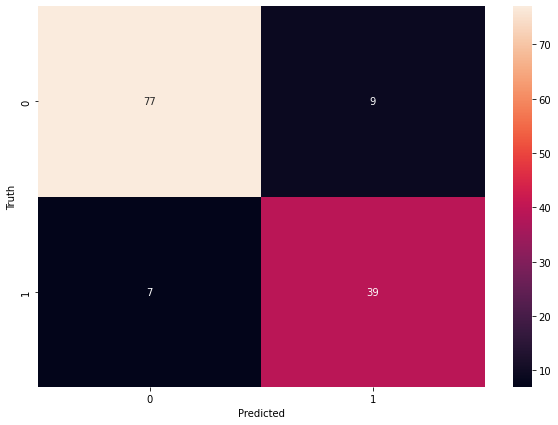

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")